In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
lp=pd.read_csv('laptops.csv',encoding='latin-1')
lp.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# DATA CLEANING

In [4]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
lp.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
lp.shape

(1303, 13)

In [7]:
lp.duplicated().sum()

0

In [8]:
lp=lp.drop_duplicates()
lp.shape

(1303, 13)

# Data Exploration

In [9]:
# lp['Unnamed: 0']=lp['Unnamed: 0'].astype('str')
# lp['Product']=lp['Product'].astype('str')
lp = lp.astype({'Unnamed: 0':'string','Product':'string'})
lp['Product']=lp['Unnamed: 0']+' '+lp['Product']
# lp['Product'].head()

In [10]:
lp.drop('Unnamed: 0',inplace=True,axis=1)

In [11]:
lp.rename(columns={'Ram':'RAM(GB)','Weight':'Weight(kg)'},inplace=True)
lp.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros
0,Apple,1 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,2 Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,3 250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,4 MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,5 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [12]:
lp['RAM(GB)']=lp['RAM(GB)'].str.replace('GB','')
lp['RAM(GB)']=lp['RAM(GB)'].astype('int32')
lp['Weight(kg)']=lp['Weight(kg)'].str.replace('kg','')
lp['Weight(kg)']=lp['Weight(kg)'].astype('float')
lp['Inches']=lp['Inches'].astype('float')
lp.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros
0,Apple,1 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,2 Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,3 250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,4 MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,5 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [13]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   string 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   RAM(GB)           1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight(kg)        1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(7), string(1)
memory usage: 127.2+ KB


In [14]:
lp['Company'].nunique()

19

In [15]:
lp['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [16]:
lp.groupby('Company').TypeName.value_counts()

Company    TypeName          
Acer       Notebook               78
           2 in 1 Convertible      8
           Gaming                  8
           Netbook                 5
           Ultrabook               4
Apple      Ultrabook              21
Asus       Notebook               67
           Gaming                 54
           Ultrabook              20
           2 in 1 Convertible     13
           Netbook                 4
Chuwi      Notebook                3
Dell       Notebook              165
           Ultrabook              49
           Gaming                 40
           2 in 1 Convertible     30
           Workstation            11
           Netbook                 2
Fujitsu    Notebook                3
Google     Ultrabook               3
HP         Notebook              184
           Ultrabook              36
           2 in 1 Convertible     19
           Workstation            14
           Gaming                 12
           Netbook                 9
Huawei  

In [17]:
lp['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [18]:
def processor(lp):
    x=str(lp['Cpu']).lower()
    if 'amd' in x:
        return 'AMD'
    else:
        return 'Intel'

In [19]:
lp['CPU_Company']=lp.apply(processor,axis=1)
lp.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,CPU_Company
0,Apple,1 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel
1,Apple,2 Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Intel
2,HP,3 250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Intel
3,Apple,4 MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel
4,Apple,5 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel


In [20]:
lp['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object

In [21]:
lp['Cpu'].head(30)

0             Intel Core i5 2.3GHz
1             Intel Core i5 1.8GHz
2       Intel Core i5 7200U 2.5GHz
3             Intel Core i7 2.7GHz
4             Intel Core i5 3.1GHz
5          AMD A9-Series 9420 3GHz
6             Intel Core i7 2.2GHz
7             Intel Core i5 1.8GHz
8       Intel Core i7 8550U 1.8GHz
9       Intel Core i5 8250U 1.6GHz
10      Intel Core i5 7200U 2.5GHz
11        Intel Core i3 6006U 2GHz
12            Intel Core i7 2.8GHz
13        Intel Core i3 6006U 2GHz
14          Intel Core M m3 1.2GHz
15            Intel Core i5 2.3GHz
16      Intel Core i7 7500U 2.7GHz
17            Intel Core i7 2.9GHz
18      Intel Core i3 7100U 2.4GHz
19      Intel Core i5 8250U 1.6GHz
20     Intel Atom x5-Z8350 1.44GHz
21     Intel Core i5 7300HQ 2.5GHz
22    AMD E-Series E2-9000e 1.5GHz
23      Intel Core i5 8250U 1.6GHz
24      Intel Core i7 8550U 1.8GHz
25        Intel Core i3 6006U 2GHz
26            Intel Core i5 1.6GHz
27      Intel Core i5 8250U 1.6GHz
28      Intel Core i

In [22]:
lp['CPU_Company'].value_counts()

Intel    1241
AMD        62
Name: CPU_Company, dtype: int64

In [23]:
lp.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,CPU_Company
0,Apple,1 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel
1,Apple,2 Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Intel
2,HP,3 250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Intel
3,Apple,4 MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel
4,Apple,5 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel


In [24]:
m=lp['Weight(kg)'].median()
m

2.04

In [25]:
u=lp['Weight(kg)'].quantile(.25)
u

1.5

In [26]:
h=lp['Weight(kg)'].quantile(.80)
h

2.4

In [27]:
def wt(lp):
    x=lp['Weight(kg)']
    if(x<=u):
        return 'Very Light'
    elif(x<m):
        return 'Light'
    elif(x<=h):
        return 'Heavy'
    else :
        return 'Very Heavy'

In [28]:
lp['Weight_Category']=lp.apply(wt,axis=1)
lp.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM(GB),Memory,Gpu,OpSys,Weight(kg),Price_euros,CPU_Company,Weight_Category
0,Apple,1 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,Very Light
1,Apple,2 Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,Very Light
2,HP,3 250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Intel,Light
3,Apple,4 MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,Light
4,Apple,5 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,Very Light


In [29]:
lp['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [30]:
lp.groupby('Weight(kg)').TypeName.value_counts()

Weight(kg)  TypeName          
0.69        2 in 1 Convertible     4
0.81        Ultrabook              2
0.91        Ultrabook              1
0.92        Ultrabook              6
0.97        Netbook                1
                                  ..
4.42        Gaming                10
            Notebook               1
4.50        Gaming                 1
4.60        Gaming                 4
4.70        Gaming                 1
Name: TypeName, Length: 289, dtype: int64

In [31]:
lp['Memory']=lp['Memory'].astype('str')
lp['Memory']=lp['Memory'].str.replace('\.0','')
lp['Memory']=lp['Memory'].str.replace('GB','')
lp['Memory']=lp['Memory'].str.replace('TB','000')
lp['Memory']=lp['Memory'].str.strip()
lp['Memory'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [32]:
def num(s):
    s=s.strip()
    if ' ' not in s:
        return 0
    ind=s.index(' ')
    s=s[:ind]
    return int(s)

In [33]:
x=lp['Memory'].str.split(' + ',expand=True)
x[0]=x[0].str.replace('Flash Storage','Flash')
x[1]=x[1].str.replace('Flash Storage','Flash')
x[0]=x[0].replace(' +','')
x['left']=x[0].str.replace('+','')
x['left']=x['left'].str.strip()
x['left'].head(25)
x['right']=x[1].str.strip()
# x['right'].head(30)

x['ls']=x['left'].apply(lambda y:1 if 'SSD' in y else 0)
x['lh']=x['left'].apply(lambda y:1 if 'HDD' in y else 0)
x['lhy']=x['left'].apply(lambda y:1 if 'Hybrid' in y else 0)
x['lf']=x['left'].apply(lambda y:1 if 'Flash' in y else 0)
x['right']=x['right'].fillna('0 ')
x['rs']=x['right'].apply(lambda y:1 if 'SSD' in y else 0)
x['rh']=x['right'].apply(lambda y:1 if 'HDD' in y else 0)
x['rhy']=x['right'].apply(lambda y:1 if 'Hybrid' in y else 0)
x['rf']=x['right'].apply(lambda y:1 if 'Flash' in y else 0)
# x['left'].head(25)
x['left_val']=x['left'].apply(num)
# x['left_val'].head(20)
x['right_val']=x['right'].apply(num)
x['right_val'].head(30)
lp['SSD']=x['ls']*x['left_val']+x['rs']*x['right_val']
lp['HDD']=x['lh']*x['left_val']+x['rh']*x['right_val']
lp['Hybrid']=x['lhy']*x['left_val']+x['rhy']*x['right_val']
lp['Flash']=x['lf']*x['left_val']+x['rf']*x['right_val']
# lp.head(50)

In [34]:
lp['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [35]:
lp['IPS Display']=lp['ScreenResolution'].apply(lambda x :1 if 'IPS' in x else 0)
lp['IPS Display'].head()

0    1
1    0
2    0
3    1
4    1
Name: IPS Display, dtype: int64

In [36]:
lp['TouchScreen']=lp['ScreenResolution'].apply(lambda x :1 if 'Touchscreen' in x else 0)
lp['TouchScreen']

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: TouchScreen, Length: 1303, dtype: int64

In [37]:
def ppi(s):
    s=str(s).strip()
    if ' ' in s:
        ind=s.rindex(' ')
        s=s[ind+1:]
    x=s.index('x')
    s1=s[:x]
    s2=s[x+1:]
    return ((int(s1))**2 + (int(s2))**2)**0.5

In [38]:
def reso(s):
    s=str(s).strip()
    if ' ' in s:
        ind=s.rindex(' ')
        s=s[ind+1:]
    return s

In [39]:
lp['ppi']=lp['ScreenResolution'].apply(ppi)/lp['Inches']

In [40]:
lp['Resolution']=lp['ScreenResolution'].apply(reso)

In [41]:
lp.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM(GB),Memory,Gpu,OpSys,...,CPU_Company,Weight_Category,SSD,HDD,Hybrid,Flash,IPS Display,TouchScreen,ppi,Resolution
0,Apple,1 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,Intel,Very Light,128,0,0,0,1,0,226.983005,2560x1600
1,Apple,2 Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,Intel,Very Light,0,0,0,128,0,0,127.677940,1440x900
2,HP,3 250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,Intel,Light,256,0,0,0,0,0,141.211998,1920x1080
3,Apple,4 MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,Intel,Light,512,0,0,0,1,0,220.534624,2880x1800
4,Apple,5 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,Intel,Very Light,256,0,0,0,1,0,226.983005,2560x1600


In [42]:
lp['Cpu'].value_counts().head(25)

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
Intel Core i5 6200U 2.3GHz               68
Intel Core i3 6006U 2GHz                 64
Intel Core i7 6500U 2.5GHz               49
Intel Core i7 6700HQ 2.6GHz              43
Intel Core i3 7100U 2.4GHz               37
Intel Core i5 7300HQ 2.5GHz              33
Intel Celeron Dual Core N3350 1.1GHz     30
Intel Celeron Dual Core N3060 1.6GHz     28
Intel Core i7 6600U 2.6GHz               18
Intel Core i3 6006U 2.0GHz               16
Intel Pentium Quad Core N4200 1.1GHz     14
Intel Core i5 7300U 2.6GHz               14
Intel Core i7 7600U 2.8GHz               13
Intel Pentium Quad Core N3710 1.6GHz     11
AMD A9-Series 9420 3GHz                  11
Intel Core i5 6300U 2.4GHz               11
Intel Celeron Dual Core N3050 1.6GHz     11
Intel Core i7 6820HK 2.7GHz     

In [43]:
lp['Cpu'].value_counts().shape

(118,)

In [44]:
def brand(s):
    s=str(s)
    if 'Intel' in s:
        if 'i7' in s:
            return 'i7'
        elif 'i5' in s:
            return 'i5'
        elif 'i3' in s:
            return 'i3'
        else:
            return 'Other Intel proc'
    elif 'AMD' in s:
        return 'AMD'
    else:
        return 'Others'

In [45]:
def clk_speed(s):
    s=str(s)
    ind=s.rindex(' ')
    s=s[ind+1:]
    g=s.index('G')
    s=s[:g]
    return float(s)

In [46]:
lp['CPU_brand']=lp['Cpu'].apply(brand)

In [47]:
lp['CPU_brand'].value_counts()

i7                  527
i5                  423
Other Intel proc    154
i3                  136
AMD                  62
Others                1
Name: CPU_brand, dtype: int64

In [48]:
lp.duplicated().sum()

0

In [49]:
lp['ClockSpeed(GHz)']=lp['Cpu'].apply(clk_speed)

In [50]:
lp['ClockSpeed(GHz)'].value_counts()

2.50    293
2.70    166
2.80    165
1.60    134
2.30     86
2.00     86
1.80     78
2.60     76
1.10     53
2.40     52
2.90     21
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
3.10      3
2.10      3
1.90      2
3.20      1
1.00      1
1.92      1
Name: ClockSpeed(GHz), dtype: int64

In [51]:
lp.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM(GB),Memory,Gpu,OpSys,...,SSD,HDD,Hybrid,Flash,IPS Display,TouchScreen,ppi,Resolution,CPU_brand,ClockSpeed(GHz)
0,Apple,1 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,...,128,0,0,0,1,0,226.983005,2560x1600,i5,2.3
1,Apple,2 Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,...,0,0,0,128,0,0,127.677940,1440x900,i5,1.8
2,HP,3 250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,...,256,0,0,0,0,0,141.211998,1920x1080,i5,2.5
3,Apple,4 MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,...,512,0,0,0,1,0,220.534624,2880x1800,i7,2.7
4,Apple,5 MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,...,256,0,0,0,1,0,226.983005,2560x1600,i5,3.1


In [52]:
lp['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [53]:
def gpu_c(s):
    s=str(s)
    if 'Intel' in s:
        return 'Intel'
    elif 'AMD' in s:
        return 'AMD'
    elif 'Nvidia' in s:
        return 'Nvidia'
    else:
        return 'Others'

In [54]:
lp['GPU_Company']=lp['Gpu'].apply(gpu_c)

In [55]:
def os_type(s):
    if s == 'Windows 10' or s == 'Windows 7' or s == 'Windows 10 S':
        return 'Windows'
    elif s == 'macOS' or s == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [56]:
lp['OS'] = lp['OpSys'].apply(os_type)

In [57]:
lp['GPU_Company'].value_counts()

Intel     722
Nvidia    400
AMD       180
Others      1
Name: GPU_Company, dtype: int64

In [58]:
lp['CPU_Company'].value_counts()

Intel    1241
AMD        62
Name: CPU_Company, dtype: int64

In [59]:
lp['RAM(GB)'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: RAM(GB), dtype: int64

# Data Analysis

## List of Companies manufacturing most no. of unique products (Top 5) :
### 1. Dell
### 2. Lenovo
### 3. HP
### 4. Asus
### 5. Acer

<AxesSubplot:>

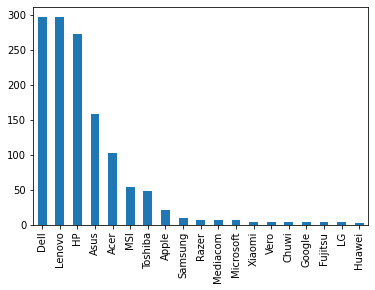

In [60]:
lp['Company'].value_counts().plot(kind='bar')

## Most expensive brands (barplot)

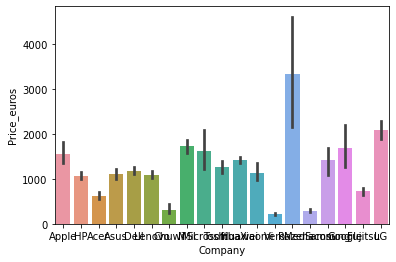

In [61]:
sns.barplot(x=lp['Company'],y=lp['Price_euros'])
plt.show()

## Most common laptop types (barplot)

<AxesSubplot:>

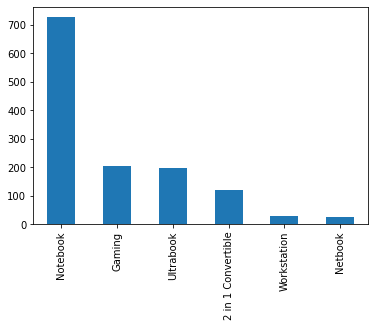

In [62]:
lp['TypeName'].value_counts().plot(kind='bar')

## Most expensive Laptop Type (barplot)

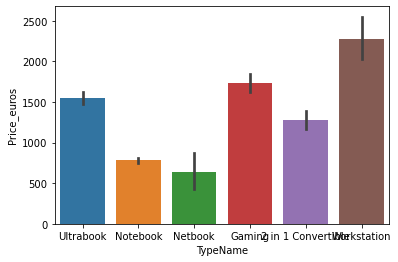

In [63]:
sns.barplot(x=lp['TypeName'],y=lp['Price_euros'])
plt.show()

## Grouping of laptops on the basis of weight category (kg) :
### Very Light -  <=1.50
### Light      -  1.50 to 2.04
### Heavy      -  2.05 to 2.40
### Very Heavy -  >2.40

<AxesSubplot:>

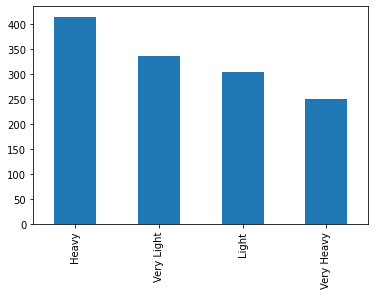

In [64]:
lp['Weight_Category'].value_counts().plot(kind='bar')

## Price vs Weight Category (barplot)

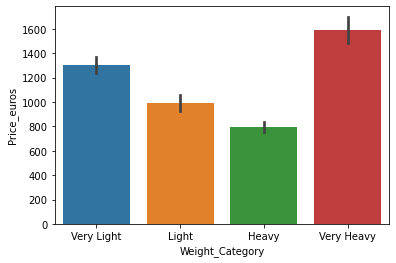

In [65]:
sns.barplot(x=lp['Weight_Category'],y=lp['Price_euros'])
plt.show()

## Distribution plot of Weight (in kg)

<AxesSubplot:xlabel='Weight(kg)', ylabel='Density'>

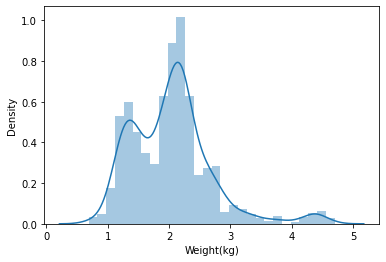

In [66]:
sns.distplot(lp['Weight(kg)'])

## Scatter plot of Price vs Weight(in kg)

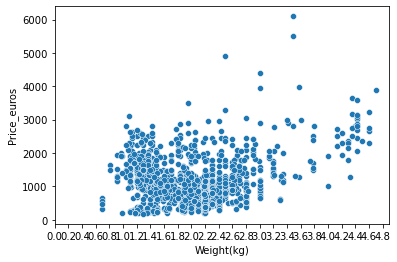

In [67]:
sns.scatterplot(x=lp['Weight(kg)'],y=lp['Price_euros'])
plt.xticks(np.arange(0, 5, 0.2))
plt.show()

## Distribution plot of Screen size (in inches)

<AxesSubplot:xlabel='Inches', ylabel='Density'>

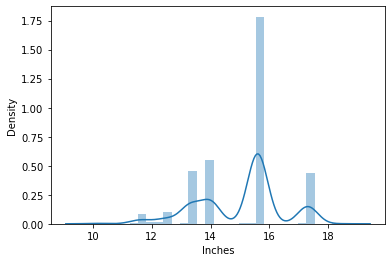

In [68]:
sns.distplot(lp['Inches'])

## Scatter plot of Price vs Screen size (in inches)

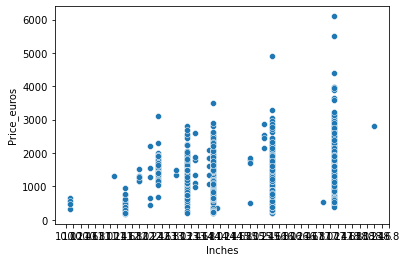

In [69]:
sns.scatterplot(x=lp['Inches'],y=lp['Price_euros'])
plt.xticks(np.arange(10, 19, 0.2))
plt.show()

## Pie Chart (CPU Company)

<AxesSubplot:ylabel='CPU_Company'>

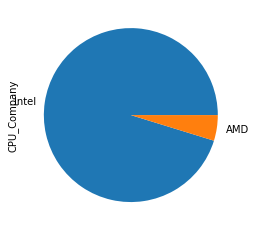

In [70]:
lp['CPU_Company'].value_counts().plot(kind='pie')

## Pie Chart (CPU Brand)

<AxesSubplot:>

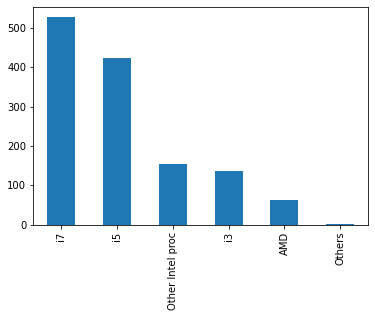

In [71]:
lp['CPU_brand'].value_counts().plot(kind='bar')

## Price vs CPU Brand (barplot)

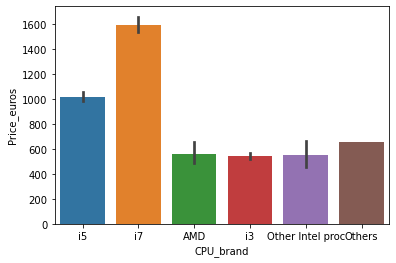

In [72]:
sns.barplot(x=lp['CPU_brand'],y=lp['Price_euros'])
plt.show()

## Pie Chart (GPU Company)

<AxesSubplot:ylabel='GPU_Company'>

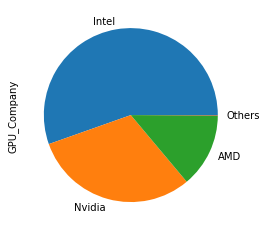

In [73]:
lp['GPU_Company'].value_counts().plot(kind='pie')

## Pie Chart (OS)

<AxesSubplot:ylabel='OS'>

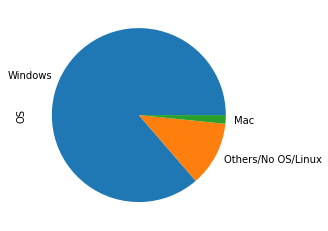

In [74]:
lp['OS'].value_counts().plot(kind='pie')

## Price vs OS (barplot)

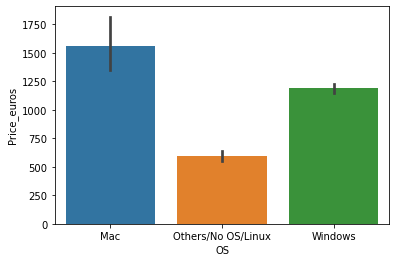

In [75]:
sns.barplot(x=lp['OS'],y=lp['Price_euros'])
plt.show()

## Most common RAM size in GB (barplot)

<AxesSubplot:>

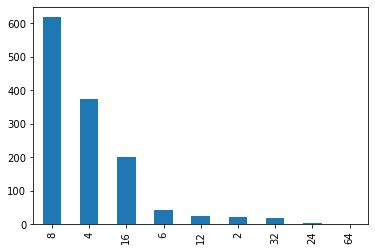

In [76]:
lp['RAM(GB)'].value_counts().plot(kind='bar')

## Price vs RAM size in GB (barplot)

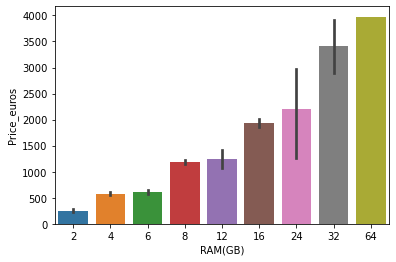

In [77]:
sns.barplot(x=lp['RAM(GB)'],y=lp['Price_euros'])
plt.show()

## Most common SSD in GB (barplot)

<AxesSubplot:>

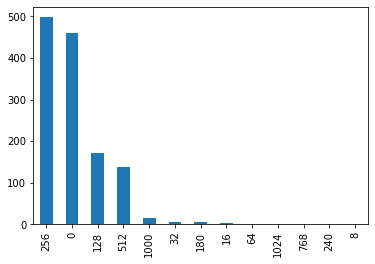

In [78]:
lp['SSD'].value_counts().plot(kind='bar')

## Price vs SSD in GB (barplot)

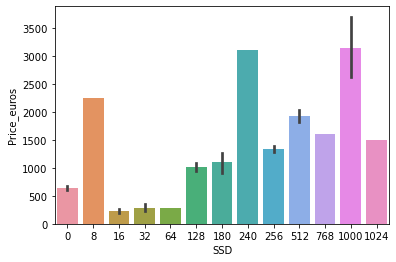

In [79]:
sns.barplot(x=lp['SSD'],y=lp['Price_euros'])
plt.show()

## Distribution plot of Clock Speed (in GHz)

<AxesSubplot:xlabel='ClockSpeed(GHz)', ylabel='Density'>

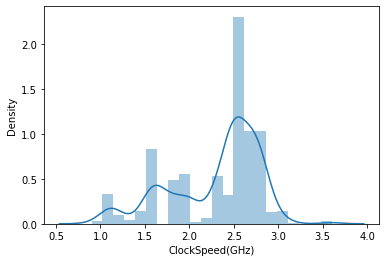

In [80]:
sns.distplot(lp['ClockSpeed(GHz)'])

## Scatter plot of Price vs Clock Speed (in GHz)

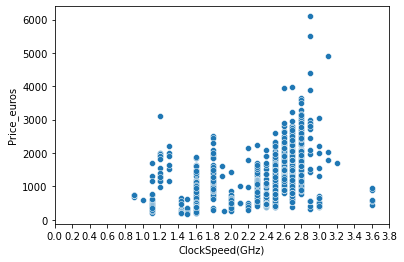

In [81]:
sns.scatterplot(x=lp['ClockSpeed(GHz)'],y=lp['Price_euros'])
plt.xticks(np.arange(0, 4, 0.2))
plt.show()

## Laptops Touch Screen (barplot)

<AxesSubplot:>

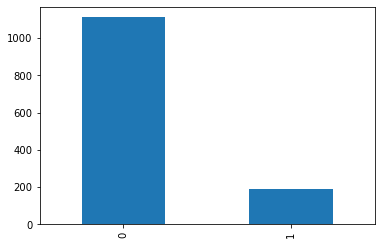

In [82]:
lp['TouchScreen'].value_counts().plot(kind='bar')

## IPS Display in Laptops (barplot)

<AxesSubplot:>

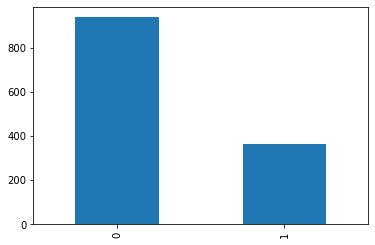

In [83]:
lp['IPS Display'].value_counts().plot(kind='bar')

In [84]:
# lp.sort_values('Price_euros',ascending=False)

## 5 Costliest laptops with 4 gb RAM

In [85]:
lp_ram=pd.DataFrame(lp['RAM(GB)'])
lp_ram['Product']=lp['Product']+' '+lp['Cpu']
# lp_ram.columns=['4gb','8gb','16gb','price']
lp_ram['4gb']=lp['RAM(GB)'].apply(lambda x : 4 if x==4 else 0)
lp_ram['price']=lp['Price_euros']
# lp_ram['8gb']=lp['RAM(GB)'].apply(lambda x : 8 if x==8 else 0)
# lp_ram['16gb']=lp['RAM(GB)'].apply(lambda x : 16 if x==16 else 0)
# lp_ram.shape
# lp_ram['Product']

In [86]:
ram_c4=pd.DataFrame(lp_ram.sort_values(['4gb','price'],ascending=[False,False]))
ram_c4=ram_c4[0:5]
ram_c4

,RAM(GB),Product,4gb,price
885,4,896 EliteBook x360 Intel Core i5 7200U 2.5GHz,4,1799.0
880,4,891 EliteBook x360 Intel Core i5 7200U 2.5GHz,4,1700.0
1094,4,1109 Elitebook 820 Intel Core i5 6200U 2.3GHz,4,1599.0
1012,4,1026 Elitebook 840 Intel Core i5 7200U 2.5GHz,4,1590.0
931,4,945 EliteBook 820 Intel Core i5 6200U 2.3GHz,4,1579.0


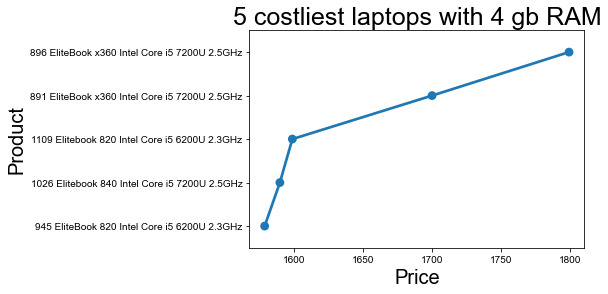

In [87]:
x1=ram_c4['price']
y1=ram_c4['Product']
ax = sns.pointplot(x=x1,y=y1)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("5 costliest laptops with 4 gb RAM",fontsize = 25)
ax.set_xlabel("Price",fontsize = 20)
ax.set_ylabel("Product",fontsize = 20)
#setup the stylesheet
sns.set_style("darkgrid")

In [88]:
lp_ram.drop('4gb',axis=1,inplace=True)

## 5 Costliest laptops with 8 gb RAM

In [89]:
lp_ram['8gb']=lp['RAM(GB)'].apply(lambda x : 8 if x==8 else 0)

In [90]:
#lp_ram.sort_values(['8gb','price'],ascending=[False,False])
ram_c8=pd.DataFrame(lp_ram.sort_values(['8gb','price'],ascending=[False,False]))
ram_c8=ram_c8[0:5]
ram_c8

,RAM(GB),Product,price,8gb
1136,8,1151 ZBook 17 Intel Core i7 6700HQ 2.6GHz,3949.4,8
911,8,924 Elitebook Folio Intel Core M 6Y75 1.2GHz,3100.0,8
563,8,570 Thinkpad P71 Intel Core i7 7700HQ 2.8GHz,2999.0,8
1103,8,1118 ZBook 17 Intel Core i7 6700HQ 2.6GHz,2899.0,8
398,8,405 Precision M5520 Intel Core i7 7700HQ 2.8GHz,2712.0,8


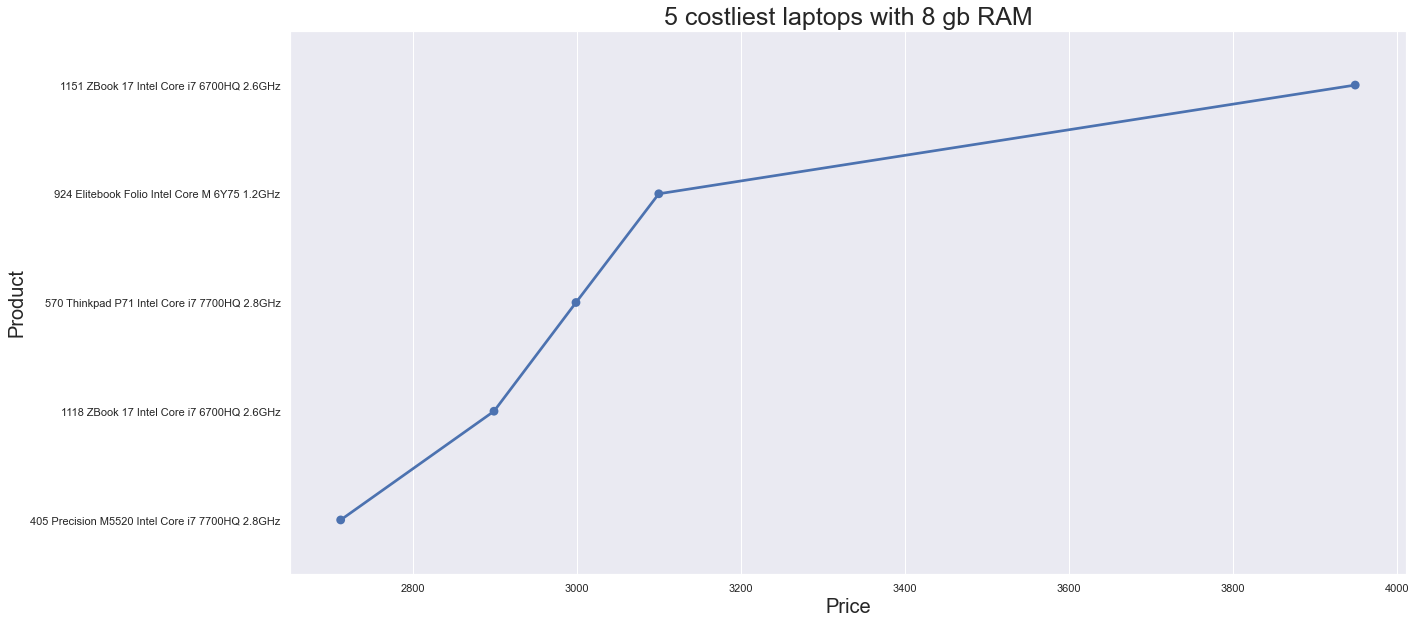

In [91]:
x2=ram_c8['price']
y2=ram_c8['Product']
ax = sns.pointplot(x=x2,y=y2)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("5 costliest laptops with 8 gb RAM",fontsize = 25)
ax.set_xlabel("Price",fontsize = 20)
ax.set_ylabel("Product",fontsize = 20)
#setup the stylesheet
sns.set_style("darkgrid")

In [92]:
# lp_ram.sort_values(['8gb','price'],ascending=[False,True])

In [93]:
lp_ram.drop('8gb',axis=1,inplace=True)

## 5 Costliest laptops with 16 gb RAM

In [94]:
lp_ram['16gb']=lp['RAM(GB)'].apply(lambda x : 16 if x==16 else 0)

In [95]:
# lp_ram.sort_values(['16gb','price'],ascending=[False,False])
ram_c16=pd.DataFrame(lp_ram.sort_values(['16gb','price'],ascending=[False,False]))
ram_c16=ram_c16[0:5]
ram_c16

,RAM(GB),Product,price,16gb
749,16,758 Zbook 17 Intel Xeon E3-1535M v5 2.9GHz,4389.0,16
1231,16,1249 Blade Pro Intel Core i7 7700HQ 2.8GHz,3499.0,16
744,16,752 Thinkpad P51s Intel Core i7 7600U 2.8GHz,3299.0,16
955,16,969 Alienware 17 Intel Core i7 7700HQ 2.8GHz,3154.0,16
204,16,208 Precision 7520 Intel Xeon E3-1505M V6 3GHz,3055.0,16


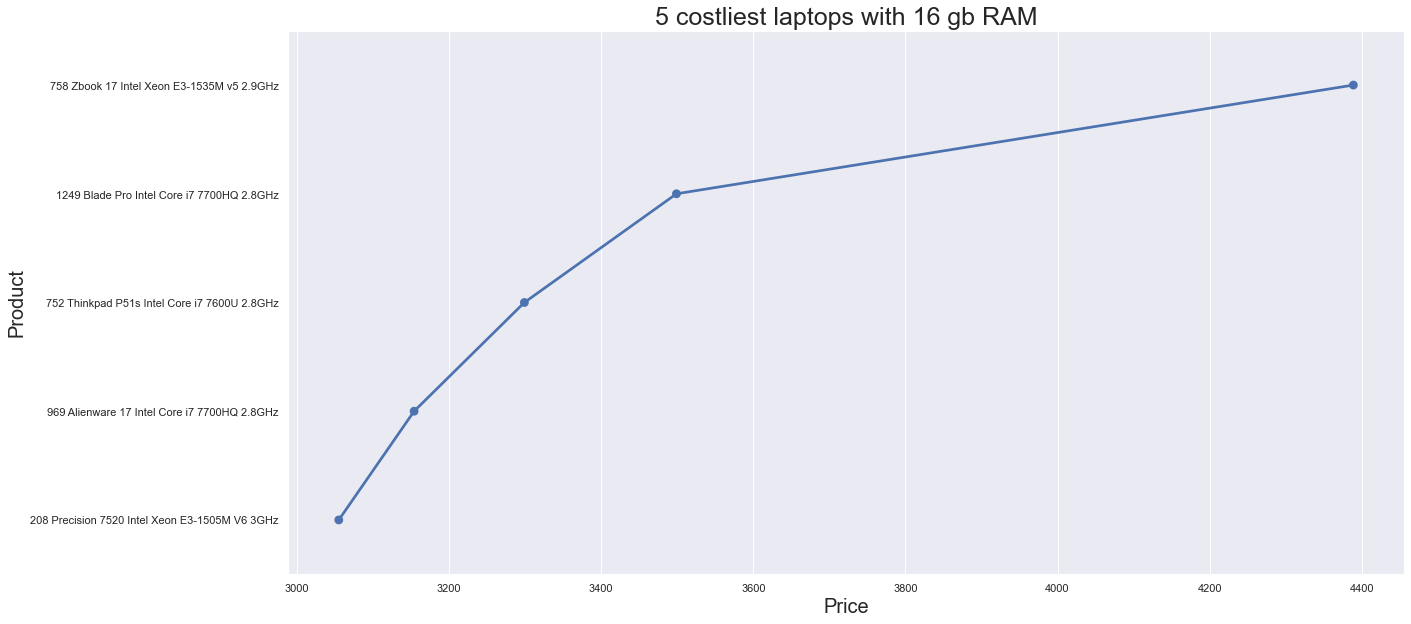

In [96]:
x3=ram_c16['price']
y3=ram_c16['Product']
ax = sns.pointplot(x=x3,y=y3)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("5 costliest laptops with 16 gb RAM",fontsize = 25)
ax.set_xlabel("Price",fontsize = 20)
ax.set_ylabel("Product",fontsize = 20)
#setup the stylesheet
sns.set_style("darkgrid")

In [97]:
lp_ram.sort_values(['16gb','price'],ascending=[False,True])

,RAM(GB),Product,price,16gb
226,16,231 Inspiron 5567 Intel Core i7 7500U 2.7GHz,859.01,16
611,16,618 Inspiron 7559 Intel Core i7 6700HQ 2.6GHz,879.01,16
235,16,240 Inspiron 5567 Intel Core i7 7500U 2.7GHz,899.00,16
1063,16,1077 Inspiron 5567 Intel Core i7 7500U 2.7GHz,989.99,16
1061,16,1075 Rog G752VL-GC088D Intel Core i7 6700HQ 2....,998.00,16
...,...,...,...,...
1136,8,1151 ZBook 17 Intel Core i7 6700HQ 2.6GHz,3949.40,0
1066,64,1081 ROG G701VO Intel Core i7 6820HK 2.7GHz,3975.00,0
610,32,617 Thinkpad P51 Intel Xeon E3-1535M v6 3.1GHz,4899.00,0
830,32,839 Blade Pro Intel Core i7 7820HK 2.9GHz,5499.00,0


## 5 Costliest laptops with Intel core i3

In [98]:
lp_cpu=pd.DataFrame(lp['CPU_brand'])
lp_cpu['Product']=lp['Product']
lp_cpu['price']=lp['Price_euros']
lp_cpu['i3']=lp['CPU_brand'].apply(lambda x : 1 if x=='i3' else 0)

In [99]:
cpu_i3=pd.DataFrame(lp_cpu.sort_values(['i3','price'],ascending=[False,False]))
cpu_i3=cpu_i3[:5]
cpu_i3

,CPU_brand,Product,price,i3
1101,i3,1116 Latitude E5270,1166.97,1
1100,i3,1115 Latitude E5270,1135.15,1
498,i3,505 ThinkPad 13,949.00,1
764,i3,773 Latitude 3380,849.00,1
1014,i3,1028 Probook 430,800.00,1


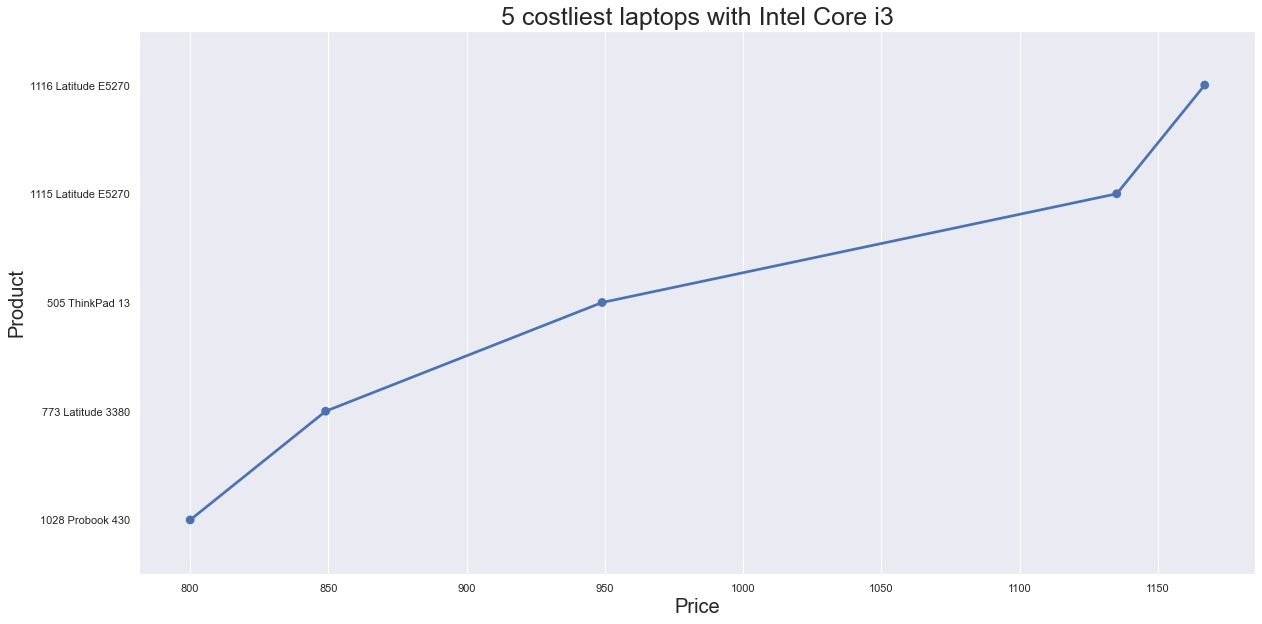

In [100]:
a1=cpu_i3['price']
b1=cpu_i3['Product']
ax = sns.pointplot(x=a1,y=b1)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("5 costliest laptops with Intel Core i3",fontsize = 25)
ax.set_xlabel("Price",fontsize = 20)
ax.set_ylabel("Product",fontsize = 20)
#setup the stylesheet
sns.set_style("darkgrid")

In [101]:
# lp_cpu.sort_values(['i3','price'],ascending=[False,True])

In [102]:
lp_cpu.drop('i3',axis=1,inplace=True)

## 5 Costliest laptops with Intel core i5

In [103]:
lp_cpu['i5']=lp['CPU_brand'].apply(lambda x : 1 if x=='i5' else 0)

In [104]:
cpu_i5=pd.DataFrame(lp_cpu.sort_values(['i5','price'],ascending=[False,False]))
cpu_i5=cpu_i5[:5]
cpu_i5

,CPU_brand,Product,price,i5
795,i5,804 ThinkPad X1,2330.00,1
848,i5,858 EliteBook x360,2277.00,1
1154,i5,1172 XPS 15,2250.68,1
1045,i5,1059 EliteBook 850,2103.34,1
682,i5,690 Alienware 15,2051.00,1


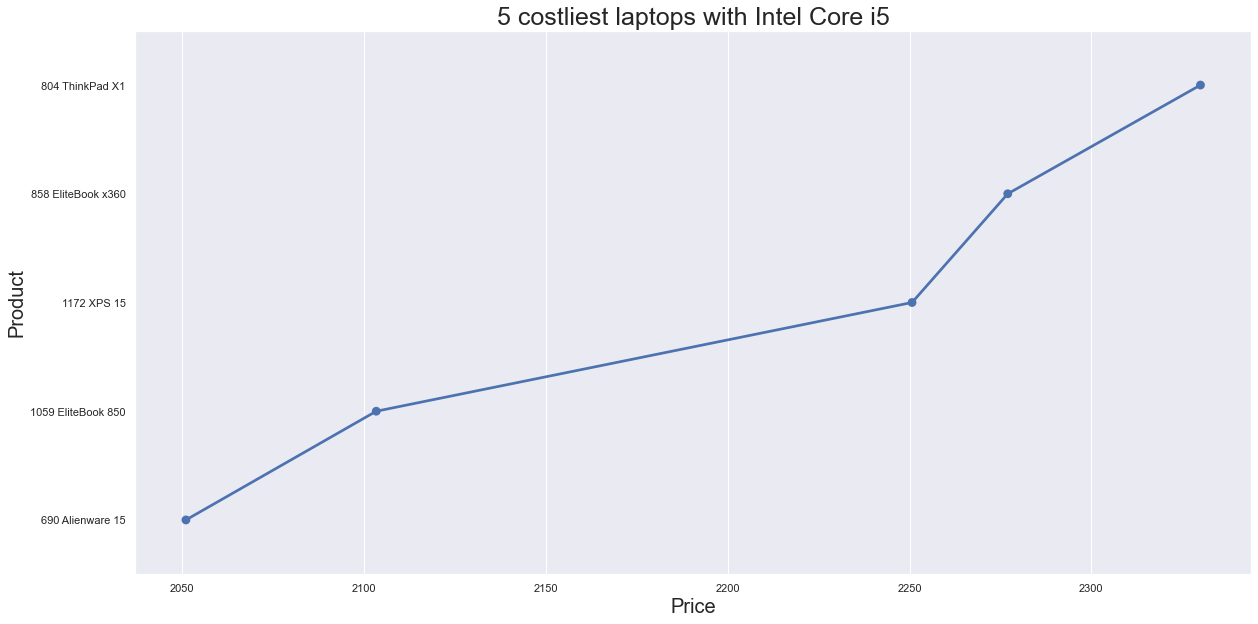

In [105]:
a2=cpu_i5['price']
b2=cpu_i5['Product']
ax = sns.pointplot(x=a2,y=b2)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("5 costliest laptops with Intel Core i5",fontsize = 25)
ax.set_xlabel("Price",fontsize = 20)
ax.set_ylabel("Product",fontsize = 20)
#setup the stylesheet
sns.set_style("darkgrid")

In [106]:
# lp_cpu.sort_values(['i5','price'],ascending=[False,True])

In [107]:
lp_cpu.drop('i5',axis=1,inplace=True)

## 5 Costliest laptops with Intel core i7

In [108]:
lp_cpu['i7']=lp['CPU_brand'].apply(lambda x : 1 if x=='i7' else 0)

In [109]:
cpu_i7=pd.DataFrame(lp_cpu.sort_values(['i7','price'],ascending=[False,False]))
cpu_i7=cpu_i7[:5]
cpu_i7

,CPU_brand,Product,price,i7
196,i7,200 Blade Pro,6099.0,1
830,i7,839 Blade Pro,5499.0,1
1066,i7,1081 ROG G701VO,3975.0,1
1136,i7,1151 ZBook 17,3949.4,1
238,i7,243 ROG G703VI-E5062T,3890.0,1


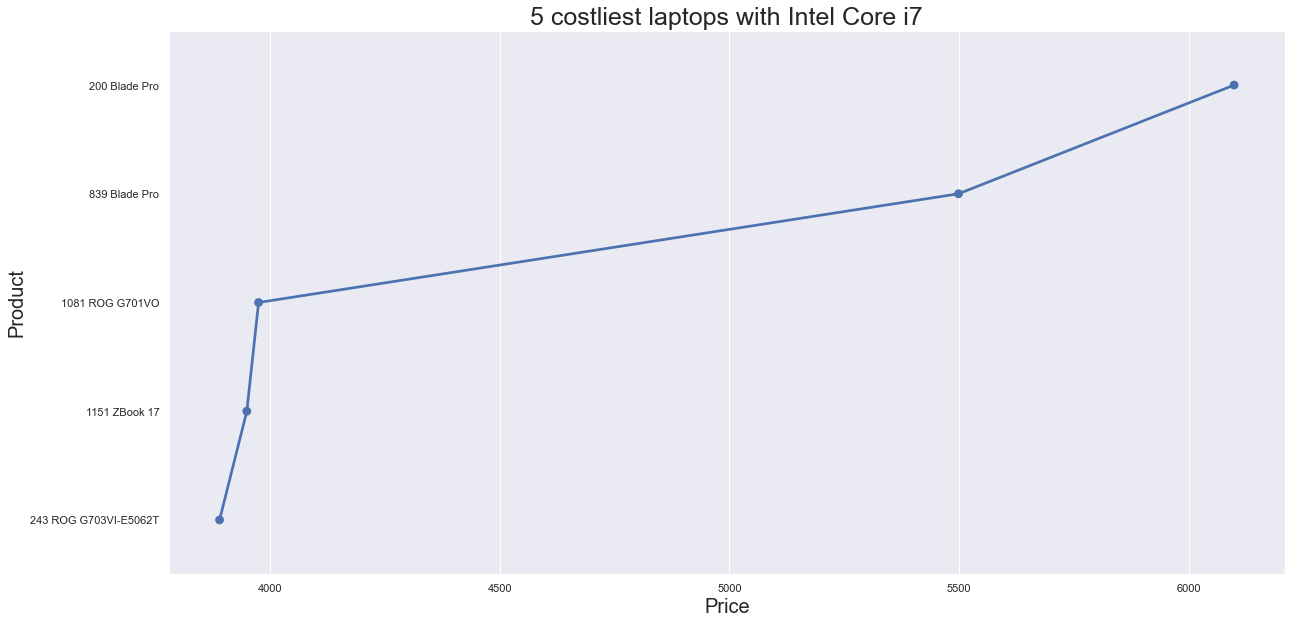

In [110]:
a3=cpu_i7['price']
b3=cpu_i7['Product']
ax = sns.pointplot(x=a3,y=b3)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("5 costliest laptops with Intel Core i7",fontsize = 25)
ax.set_xlabel("Price",fontsize = 20)
ax.set_ylabel("Product",fontsize = 20)
#setup the stylesheet
sns.set_style("darkgrid")

In [111]:
# lp_cpu.sort_values(['i7','price'],ascending=[False,True])

In [112]:
lp['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

## 5 Costliest laptops with Touch Screen

In [113]:
ts=pd.DataFrame(lp.sort_values(['TouchScreen','Price_euros'],ascending=[False,False]))
ts=ts[:5]
ts

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM(GB),Memory,Gpu,OpSys,...,Hybrid,Flash,IPS Display,TouchScreen,ppi,Resolution,CPU_brand,ClockSpeed(GHz),GPU_Company,OS
196,Razer,200 Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1000 SSD,Nvidia GeForce GTX 1080,Windows 10,...,0,0,0,1,254.671349,3840x2160,i7,2.9,Nvidia,Windows
830,Razer,839 Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512 SSD,Nvidia GeForce GTX 1080,Windows 10,...,0,0,0,1,254.671349,3840x2160,i7,2.9,Nvidia,Windows
911,HP,924 Elitebook Folio,Ultrabook,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8,240 SSD,Intel HD Graphics 515,Windows 10,...,0,0,0,1,352.465147,3840x2160,Other Intel proc,1.2,Intel,Windows
190,Lenovo,194 Thinkpad Yoga,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16,1000 SSD,Intel HD Graphics 620,Windows 10,...,0,0,0,1,209.800683,2560x1440,i7,2.7,Intel,Windows
491,Toshiba,498 Portege X30-D-10L,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,32,512 SSD,Intel HD Graphics 620,Windows 10,...,0,0,0,1,165.632118,1920x1080,i7,2.7,Intel,Windows


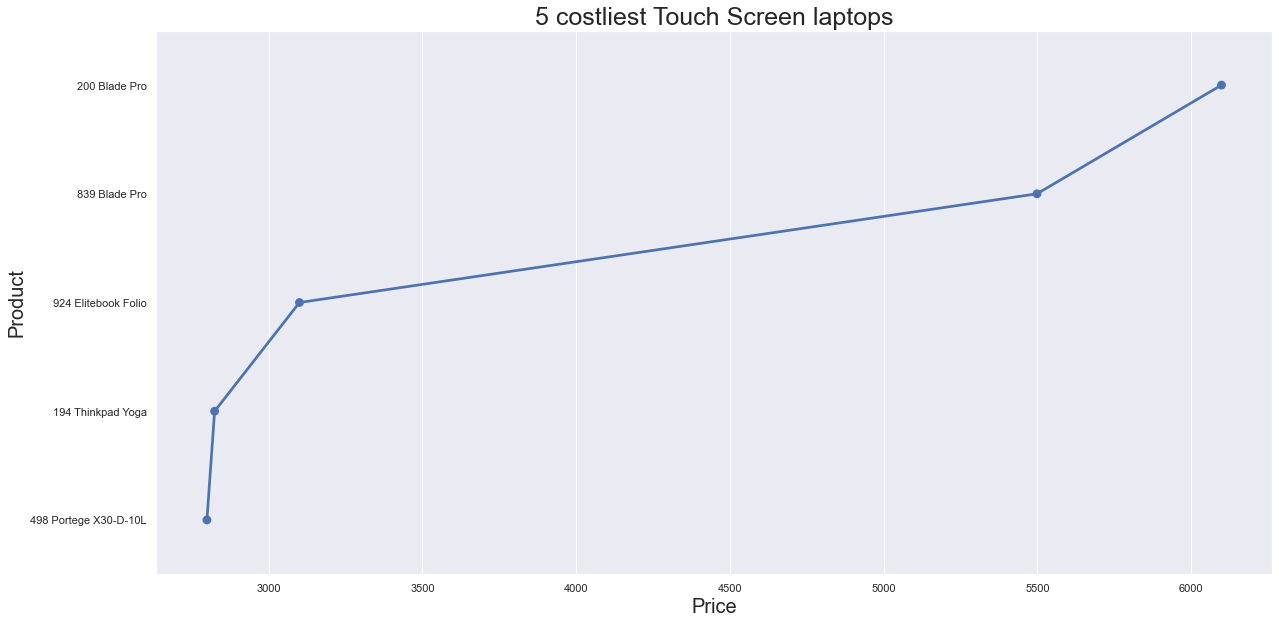

In [114]:
t=ts['Price_euros']
s=ts['Product']
ax = sns.pointplot(x=t,y=s)
sns.set(rc={'figure.figsize':(20,10)})
ax.set_title("5 costliest Touch Screen laptops",fontsize = 25)
ax.set_xlabel("Price",fontsize = 20)
ax.set_ylabel("Product",fontsize = 20)
#setup the stylesheet
sns.set_style("darkgrid")

In [115]:
# lp.sort_values(['TouchScreen','Price_euros'],ascending=[False,True])

In [116]:
lp.describe()

,Inches,RAM(GB),Weight(kg),Price_euros,SSD,HDD,Hybrid,Flash,IPS Display,TouchScreen,ppi,ClockSpeed(GHz)
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,1123.686992,183.732924,413.783576,8.831926,4.555641,0.280123,0.147352,146.635987,2.298772
std,1.426304,5.084665,0.665475,699.009043,186.966903,515.818779,92.567185,30.274090,0.449231,0.354593,43.121345,0.506340
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.583402,0.900000
25%,14.000000,4.000000,1.500000,599.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,127.335675,2.000000
50%,15.600000,8.000000,2.040000,977.000000,256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141.211998,2.500000
75%,15.600000,8.000000,2.300000,1487.880000,256.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,157.350512,2.700000
max,18.400000,64.000000,4.700000,6099.000000,1024.000000,2000.000000,1000.000000,512.000000,1.000000,1.000000,352.465147,3.600000


In [117]:
lp.corr()

,Inches,RAM(GB),Weight(kg),Price_euros,SSD,HDD,Hybrid,Flash,IPS Display,TouchScreen,ppi,ClockSpeed(GHz)
Inches,1.000000,0.237993,0.827631,0.068197,-0.107732,0.530771,0.054067,-0.229803,-0.114804,-0.361735,-0.414804,0.307870
RAM(GB),0.237993,1.000000,0.383874,0.743007,0.603634,0.096288,0.038461,-0.060177,0.206623,0.116984,0.303763,0.368000
Weight(kg),0.827631,0.383874,1.000000,0.210370,-0.062742,0.514491,0.095155,-0.179916,0.016967,-0.294620,-0.323240,0.320434
Price_euros,0.068197,0.743007,0.210370,1.000000,0.670799,-0.096441,0.007989,-0.040511,0.252208,0.191226,0.473487,0.430293
SSD,-0.107732,0.603634,-0.062742,0.670799,1.000000,-0.399896,-0.059750,-0.147991,0.223795,0.255092,0.506895,0.256076
HDD,0.530771,0.096288,0.514491,-0.096441,-0.399896,1.000000,-0.076596,-0.117658,-0.094461,-0.209733,-0.295411,0.129465
Hybrid,0.054067,0.038461,0.095155,0.007989,-0.059750,-0.076596,1.000000,-0.014368,-0.022601,-0.039679,-0.020212,0.064139
Flash,-0.229803,-0.060177,-0.179916,-0.040511,-0.147991,-0.117658,-0.014368,1.000000,0.069643,-0.019080,0.077753,-0.224134
IPS Display,-0.114804,0.206623,0.016967,0.252208,0.223795,-0.094461,-0.022601,0.069643,1.000000,0.150512,0.300879,0.063035
TouchScreen,-0.361735,0.116984,-0.294620,0.191226,0.255092,-0.209733,-0.039679,-0.019080,0.150512,1.000000,0.460587,-0.082579


## Heatmap to find correlation in data

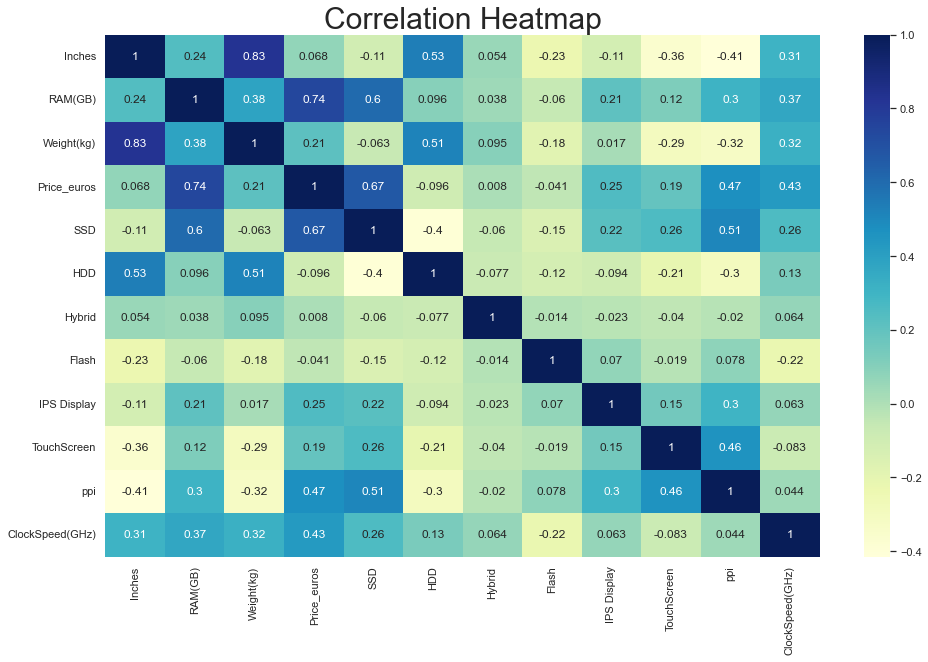

In [118]:
plt.figure(figsize=(16,9.6)) 
sns.heatmap(lp.corr(),annot=True,cmap='YlGnBu') 
plt.title("Correlation Heatmap",fontsize=30) 
plt.show()

## Significant Correlations :
##### RAM & Price
##### SSD & Price
##### Inches & Weight
##### SSD & RAM

## Price vs RAM (regplot)

<AxesSubplot:xlabel='RAM(GB)', ylabel='Price_euros'>

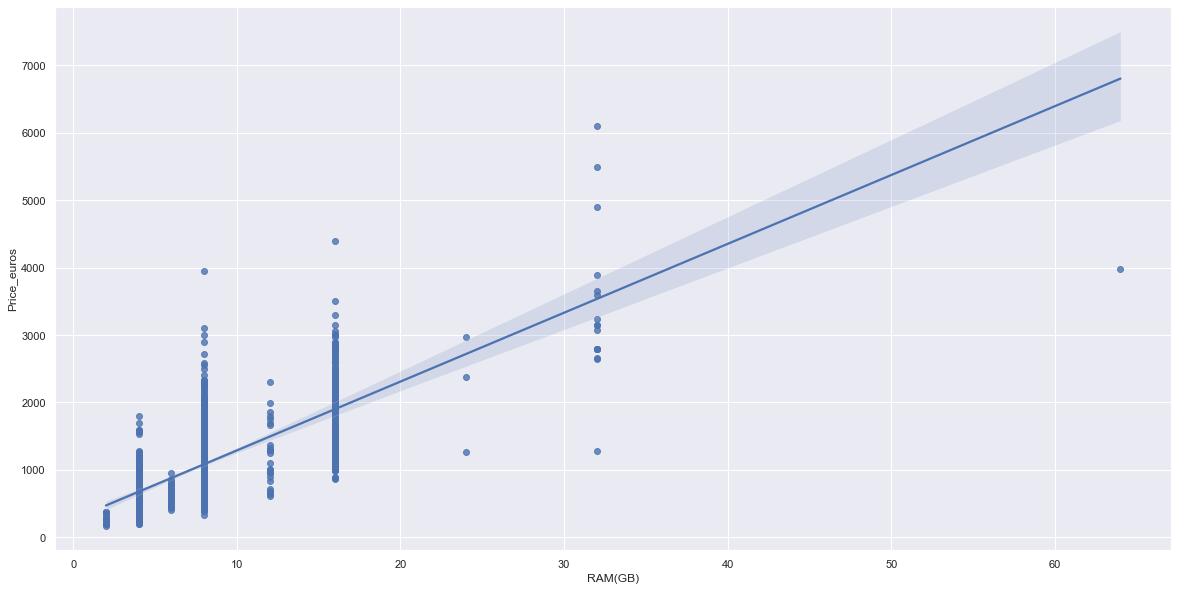

In [119]:
sns.regplot(x="RAM(GB)",y="Price_euros",data=lp)

## Price vs SSD (regplot)

<AxesSubplot:xlabel='SSD', ylabel='Price_euros'>

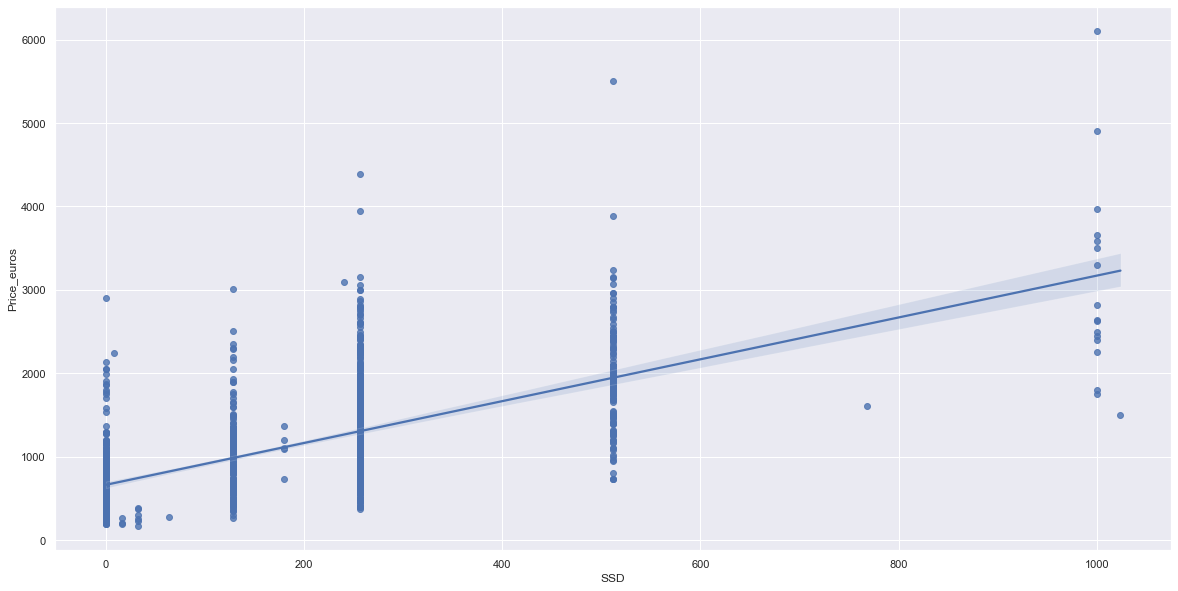

In [120]:
sns.regplot(x="SSD",y="Price_euros",data=lp)

## Weight vs Screen Size (regplot)

<AxesSubplot:xlabel='Inches', ylabel='Weight(kg)'>

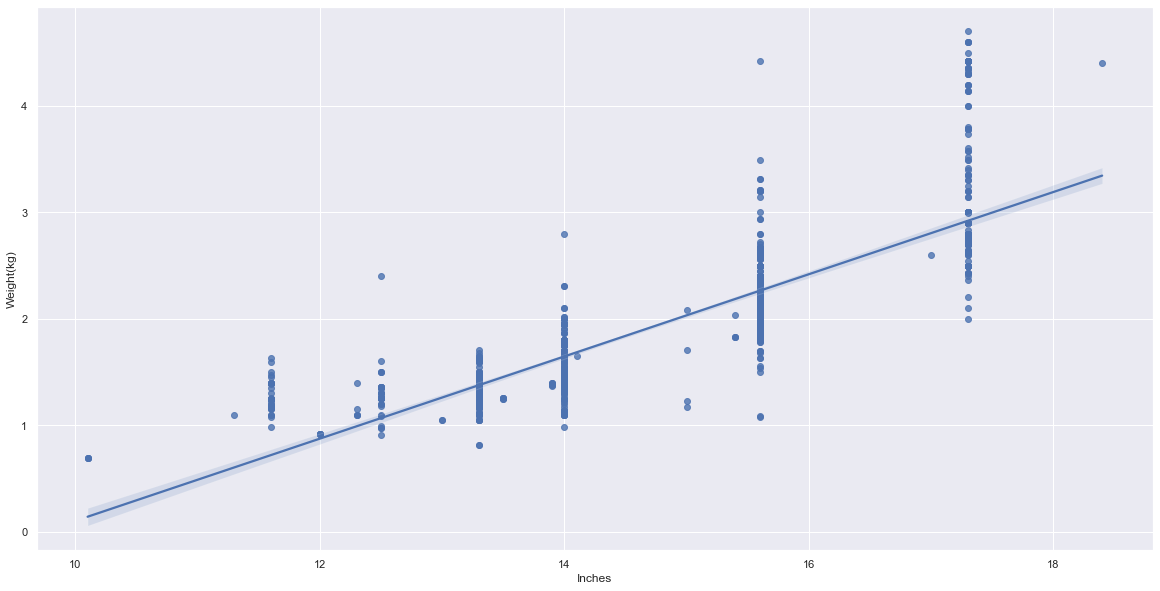

In [121]:
sns.regplot(x="Inches",y="Weight(kg)",data=lp)

## RAM vs SSD (regplot)

<AxesSubplot:xlabel='SSD', ylabel='RAM(GB)'>

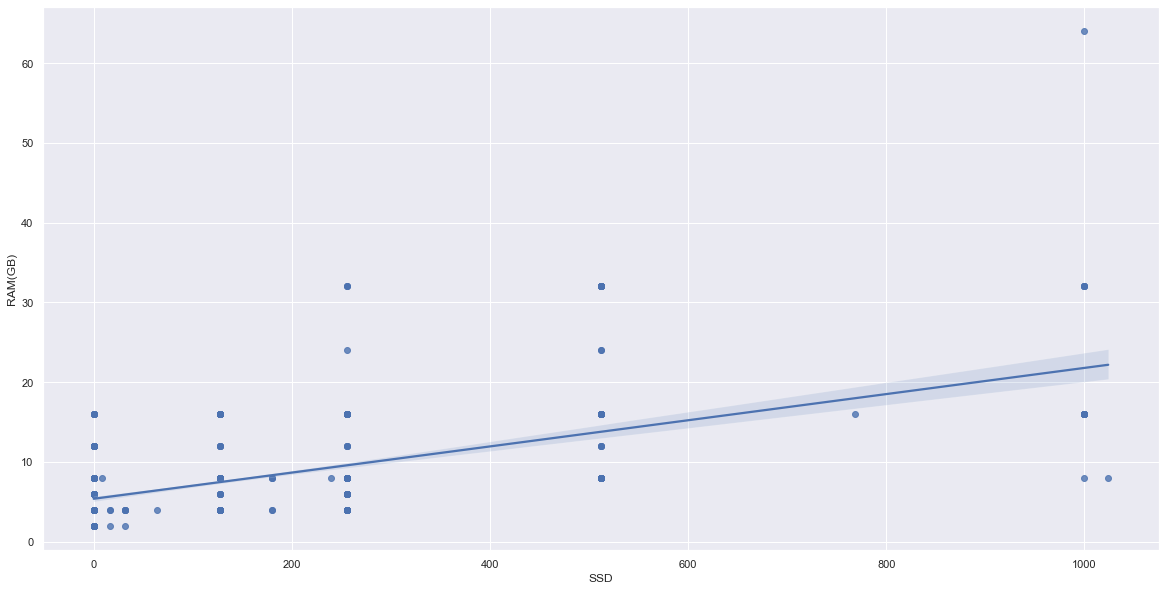

In [122]:
sns.regplot(x="SSD",y="RAM(GB)",data=lp)

## Pair plot of dataframe

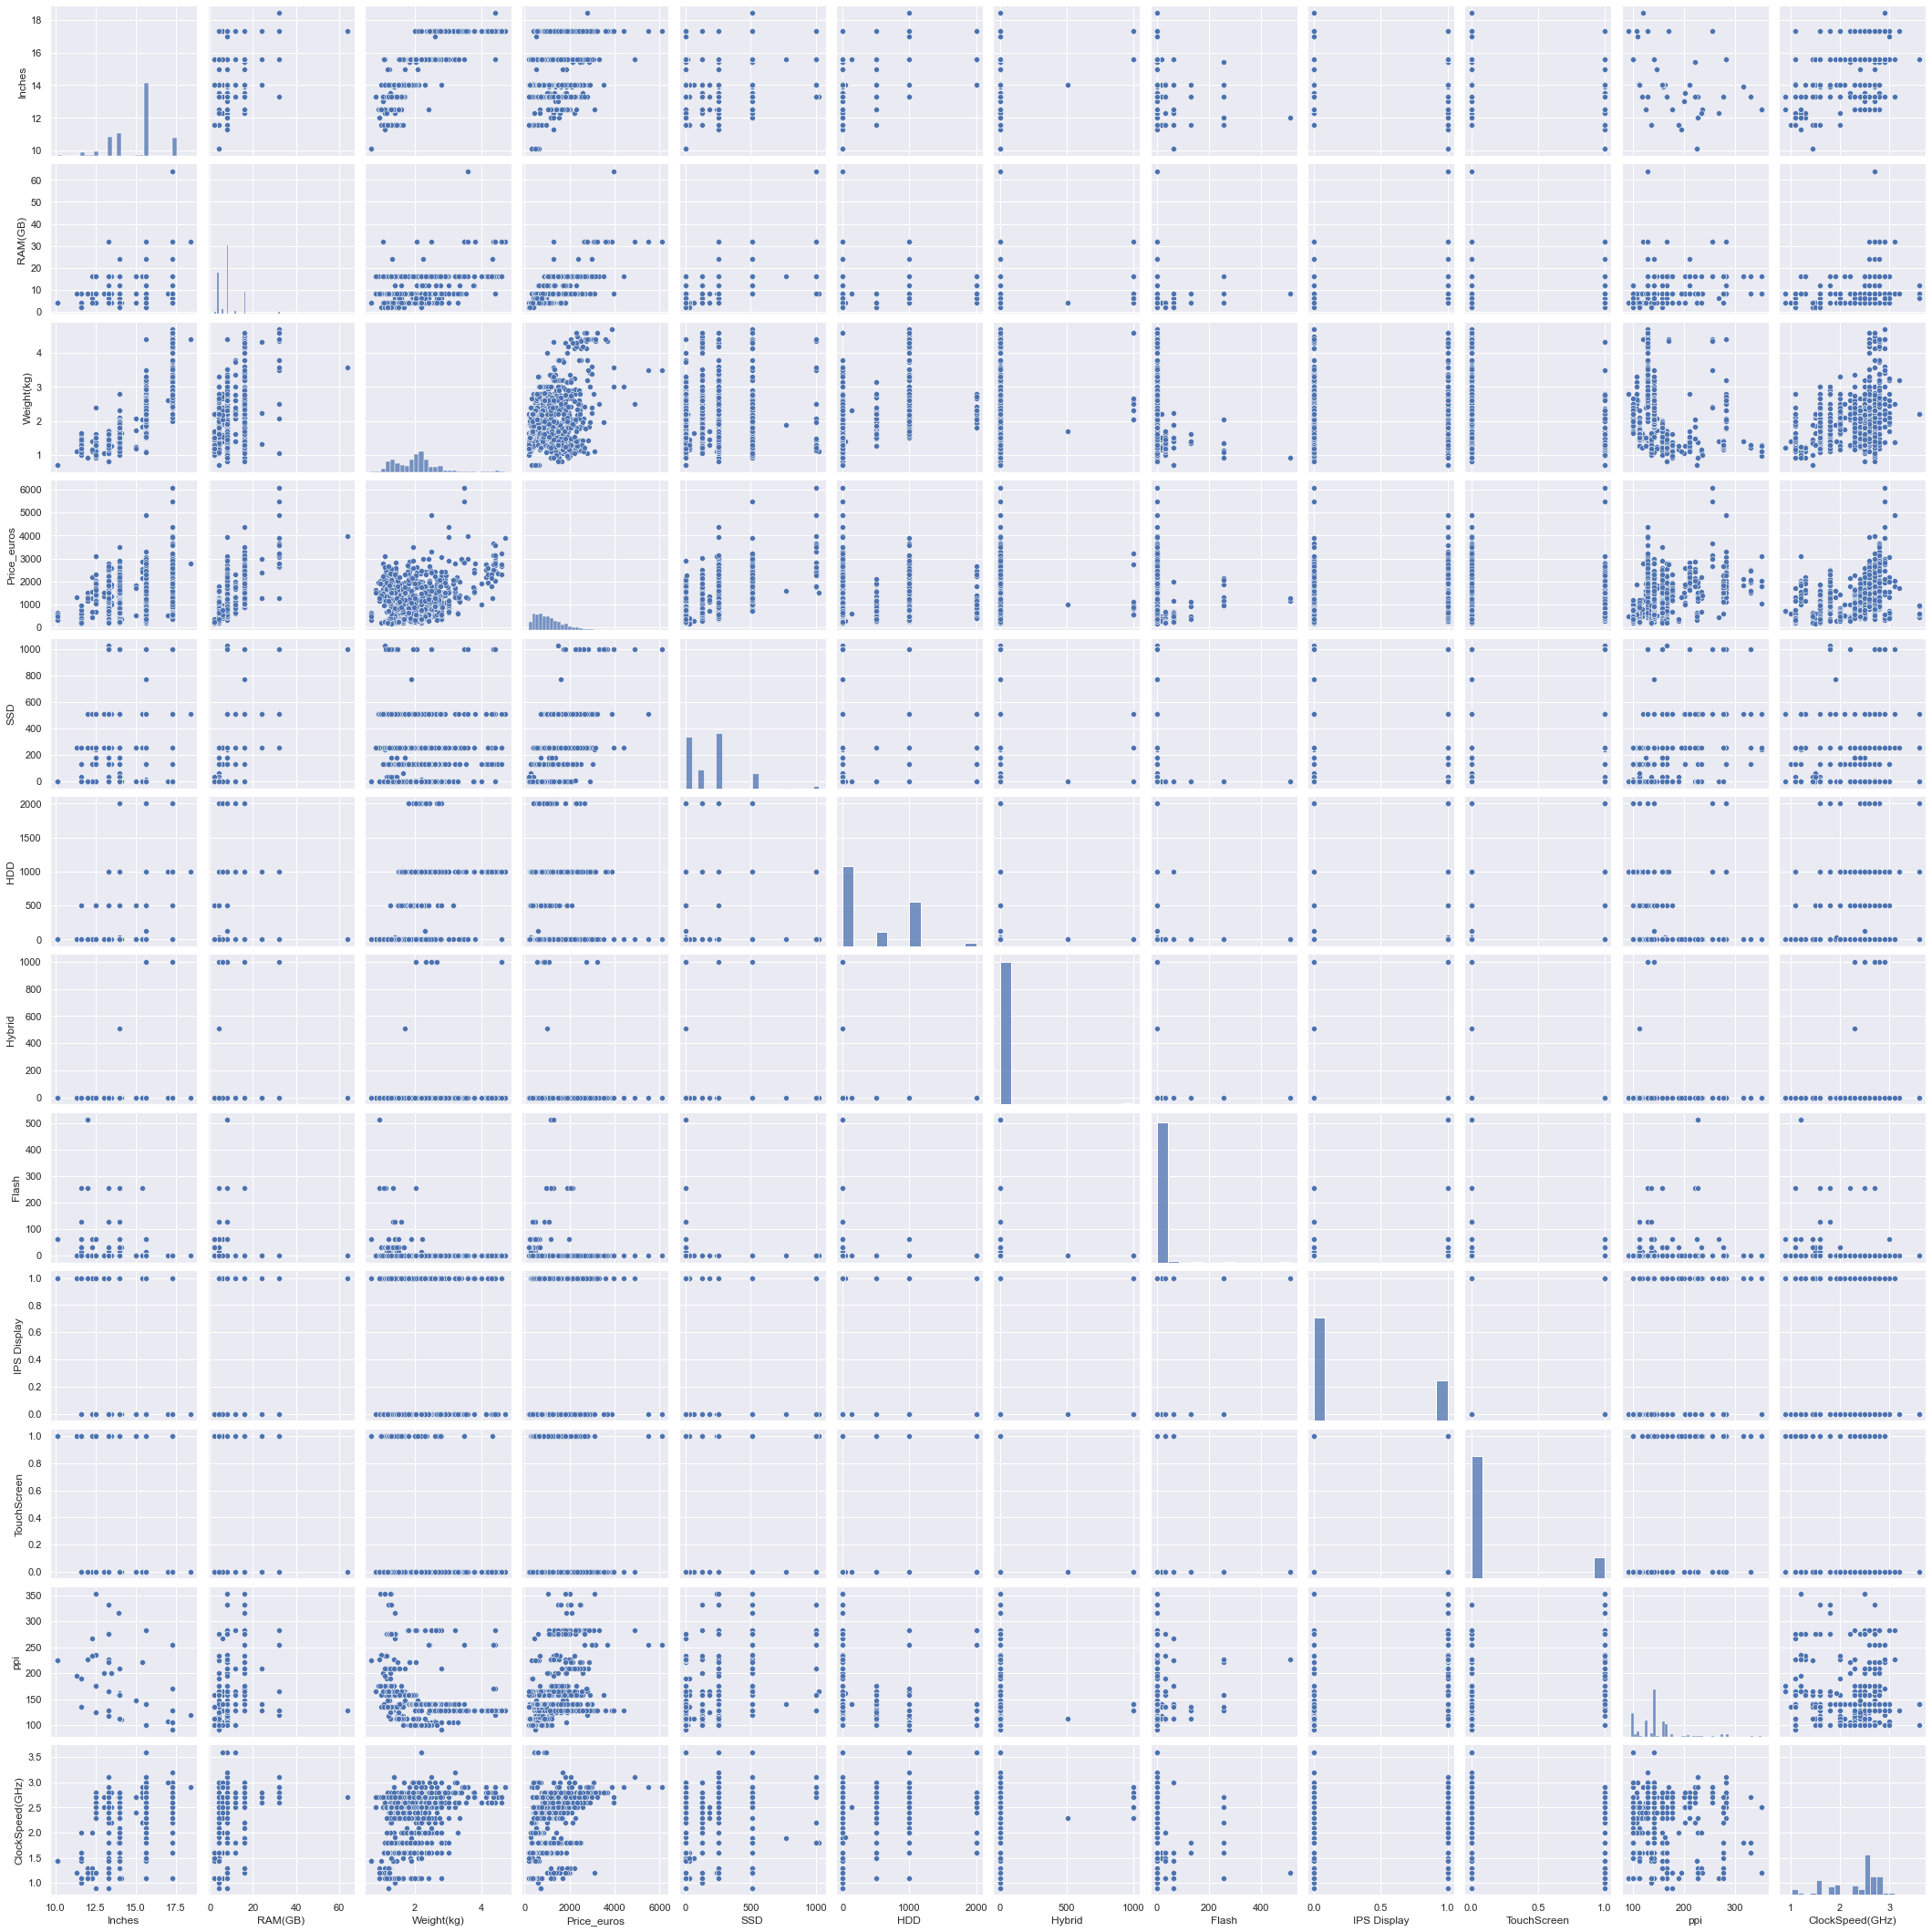

In [123]:
sns.pairplot(lp)

In [124]:
lp.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'RAM(GB)', 'Memory', 'Gpu', 'OpSys', 'Weight(kg)', 'Price_euros',
       'CPU_Company', 'Weight_Category', 'SSD', 'HDD', 'Hybrid', 'Flash',
       'IPS Display', 'TouchScreen', 'ppi', 'Resolution', 'CPU_brand',
       'ClockSpeed(GHz)', 'GPU_Company', 'OS'],
      dtype='object')

In [125]:
# X=lp[['Company','TypeName','Inches',
#        'RAM(GB)','OpSys','Weight_Category',
#        'CPU_Company','SSD','HDD','Hybrid','Flash',
#        'IPS Display','TouchScreen','ppi','CPU_brand',
#        'ClockSpeed(GHz)','GPU_Company']]
X=lp[['Company','TypeName','CPU_brand','GPU_Company','OpSys','Weight(kg)',
      'Inches','RAM(GB)','HDD','SSD','Hybrid','Flash',
       'IPS Display','TouchScreen','ppi',
       'ClockSpeed(GHz)']]
Y=np.log(lp['Price_euros'])

## Training Data

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=2)

In [127]:
X

,Company,TypeName,CPU_brand,GPU_Company,OpSys,Weight(kg),Inches,RAM(GB),HDD,SSD,Hybrid,Flash,IPS Display,TouchScreen,ppi,ClockSpeed(GHz)
0,Apple,Ultrabook,i5,Intel,macOS,1.37,13.3,8,0,128,0,0,1,0,226.983005,2.3
1,Apple,Ultrabook,i5,Intel,macOS,1.34,13.3,8,0,0,0,128,0,0,127.677940,1.8
2,HP,Notebook,i5,Intel,No OS,1.86,15.6,8,0,256,0,0,0,0,141.211998,2.5
3,Apple,Ultrabook,i7,AMD,macOS,1.83,15.4,16,0,512,0,0,1,0,220.534624,2.7
4,Apple,Ultrabook,i5,Intel,macOS,1.37,13.3,8,0,256,0,0,1,0,226.983005,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,i7,Intel,Windows 10,1.80,14.0,4,0,128,0,0,1,1,157.350512,2.5
1299,Lenovo,2 in 1 Convertible,i7,Intel,Windows 10,1.30,13.3,16,0,512,0,0,1,1,276.053530,2.5
1300,Lenovo,Notebook,Other Intel proc,Intel,Windows 10,1.50,14.0,2,0,0,0,64,0,0,111.935204,1.6
1301,HP,Notebook,i7,AMD,Windows 10,2.19,15.6,6,1000,0,0,0,0,0,100.454670,2.5


In [128]:
X_train

,Company,TypeName,CPU_brand,GPU_Company,OpSys,Weight(kg),Inches,RAM(GB),HDD,SSD,Hybrid,Flash,IPS Display,TouchScreen,ppi,ClockSpeed(GHz)
205,Lenovo,Gaming,i7,Nvidia,No OS,2.40,15.6,16,0,512,0,0,0,0,141.211998,2.8
288,Lenovo,Gaming,i7,Nvidia,Windows 10,2.50,15.6,16,1000,256,0,0,1,0,141.211998,2.8
56,HP,Notebook,i3,Intel,Windows 10,1.91,15.6,4,0,128,0,0,0,0,141.211998,2.0
384,Asus,Ultrabook,i7,Intel,Windows 10,1.10,13.3,16,0,512,0,0,0,1,165.632118,2.7
1167,Lenovo,Notebook,i3,Nvidia,Windows 10,2.20,15.6,4,1000,0,0,0,0,0,141.211998,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,i3,Nvidia,Windows 10,2.20,15.6,4,500,0,0,0,0,0,100.454670,2.0
299,Asus,Ultrabook,i7,Nvidia,Windows 10,1.63,15.6,16,0,512,0,0,0,0,141.211998,2.7
493,Acer,Notebook,AMD,AMD,Windows 10,2.20,15.6,8,1000,0,0,0,0,0,100.454670,2.5
527,Lenovo,Notebook,i3,Nvidia,No OS,2.20,15.6,8,2000,0,0,0,0,0,100.454670,2.0


In [129]:
lp['OS'].value_counts()

Windows               1125
Others/No OS/Linux     157
Mac                     21
Name: OS, dtype: int64

## Applying Linear Regression to the dataset for Price Prediction 

In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [131]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2,3,4])
],remainder='passthrough')

step2 = LinearRegression()

lm = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

lm.fit(X_train,Y_train)

Y_hat = lm.predict(X_test)

print('R2 score : ',r2_score(Y_test,Y_hat))
print('MAE : ',mean_absolute_error(Y_test,Y_hat))

R2 score :  0.8053019186480996
MAE :  0.20289500270563213


In [132]:
Y_pred=np.exp(Y_hat)
# Y_pred

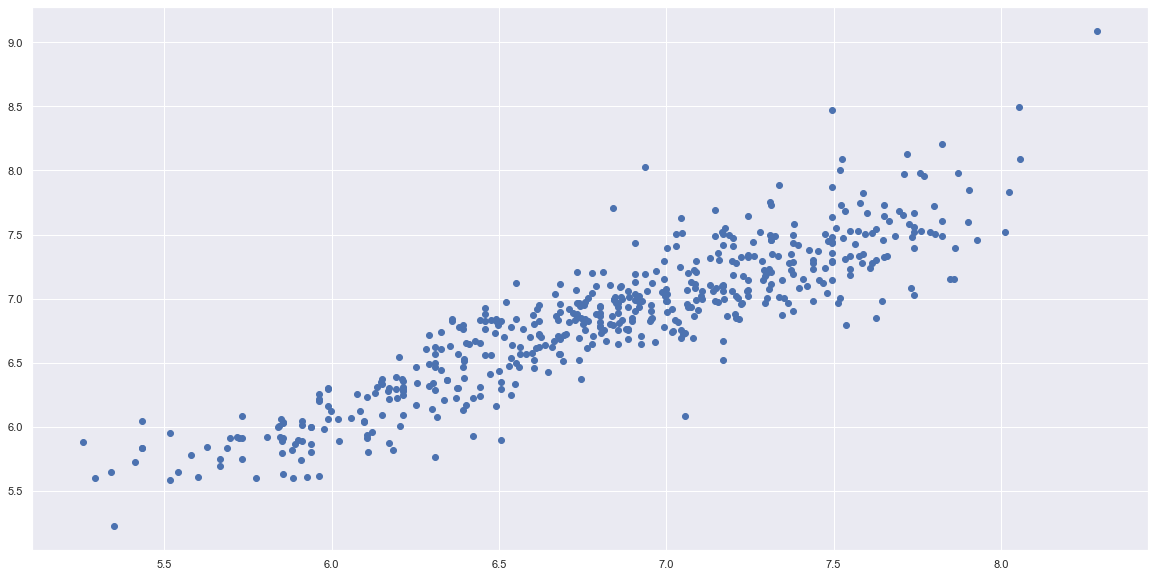

In [133]:
predictions = lm.predict(X_test)
plt.scatter(Y_test,predictions)
plt.show()

## Exporting the model

In [134]:
import pickle
pickle.dump(lp,open('lp.pkl','wb'))
pickle.dump(lm,open('lm.pkl','wb'))